<a href="https://colab.research.google.com/github/bhic1973/jupyterlab-notebooks/blob/master/gseii_s5_tp_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Importation des modules necessaires au deroulement du TP
from skimage import data, transform, filters, color, io, util, feature
from skimage.util.noise import random_noise as rn
import numpy as np
import matplotlib.pyplot as plt
rc = {
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'xtick.bottom' : False,
    'xtick.labelbottom': False,
    'ytick.left': False,
    'ytick.labelleft': False,
    'font.size': 16,
    'figure.figsize': (16,9),
    'text.color': 'blue'
}
plt.rcParams.update(rc)
%matplotlib inline
%mkdir images

mkdir: cannot create directory ‘images’: File exists


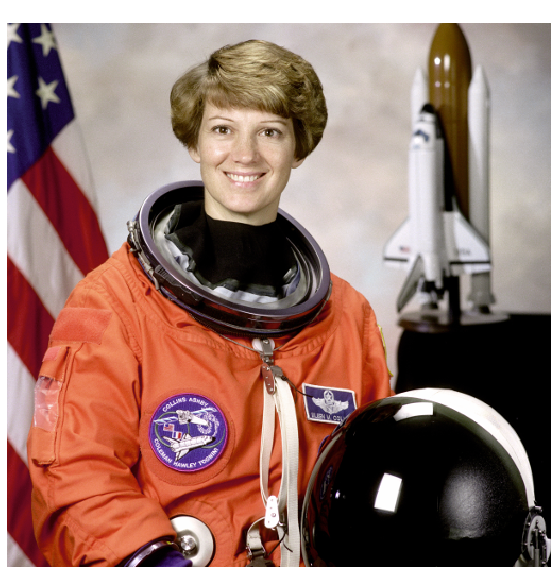

In [2]:
im = data.astronaut()
plt.figure(figsize=(10,10))
if len(im.shape) == 3:
    plt.imshow(im)
    plt.title('Astronaut RGB image')
else:
    plt.imshow(im,cmap='gray')
    plt.title('Atronaut Grayscale image')

In [0]:
def imDisplay(im,ax,cmap):
    if len(im.shape)==3:
        ax.imshow(im)
        ax.set_title("RGB image")
    else: 
        ax.imshow(im,cmap=cmap)
        ax.set_title(cmap+" image ")

channelDecompose= lambda im: [im[:,:,i] for i in range(im.shape[2]) ] if len(im.shape)==3 else print("erreur, l'image ne possede pas de cannaux rgb")

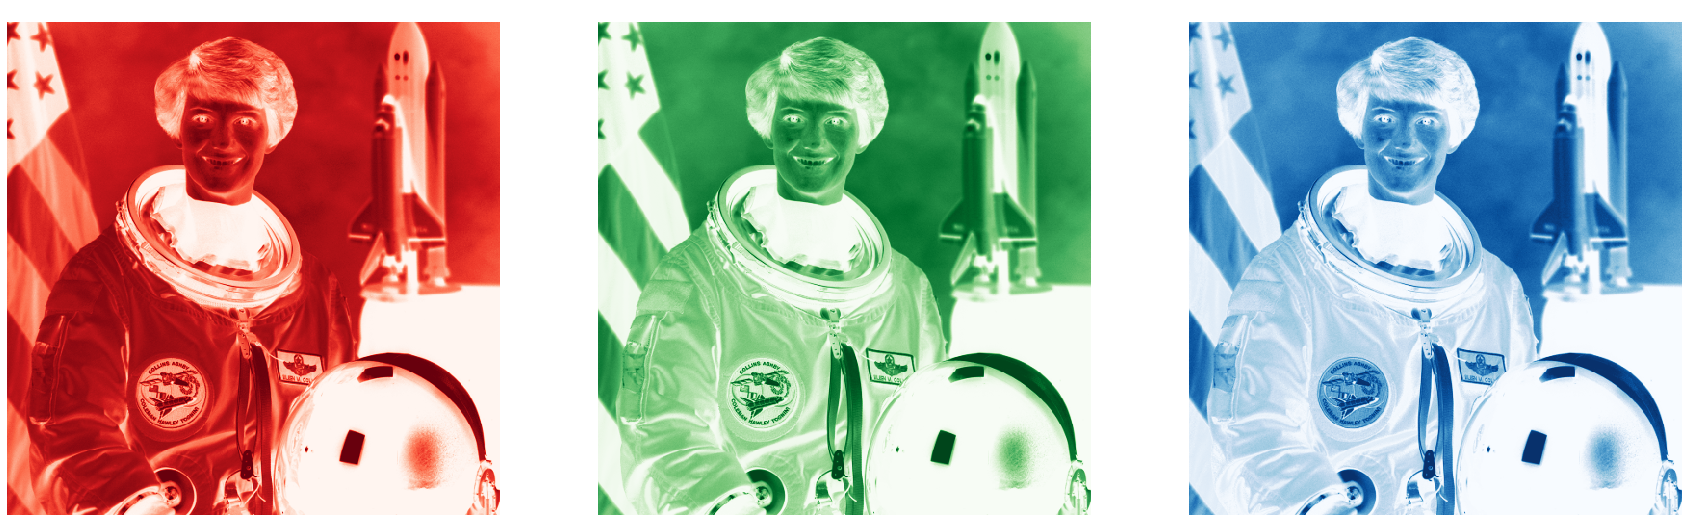

In [4]:
axs = plt.subplots(1,3,figsize=(30,10))[1].ravel()
im_list = channelDecompose(im)
cmaps = ['Reds','Greens','Blues']

for ax, cmap, canal in zip(axs,cmaps, im_list):
    imDisplay(canal,ax,cmap)

In [5]:
print("""
    Displaying some statistics about the astronaut image ...
    Astronaaut image has {:4d} lines, {:4d} columns and {} pixels.
    It has also an average brightness equal to {:3.2f} and a local contrast equal to {:3.2f}
    The extremal values are: min = {:3.0f}, max = {:3.0f} and median = {:3.0f}
""".format(im.shape[0],im.shape[1],im.shape[0]*im.shape[1],im.mean(),im.std(),im.min(),im.max(),np.median(im)))


    Displaying some statistics about the astronaut image ...
    Astronaaut image has  512 lines,  512 columns and 262144 pixels.
    It has also an average brightness equal to 114.60 and a local contrast equal to 81.23
    The extremal values are: min =   0, max = 255 and median = 120



In [0]:
im2double = lambda im : im.astype('float')/255 if im.dtype=='uint8' else print("erreur dtat image type")
linRGB = lambda im : np.where(im <= 0.04045, im/12.92, np.power((im+0.055)/1.055,2.4))


First ten elements of uint8 and float images :
Uint8 data :[154, 109, 63, 54, 76, 100, 124, 139, 148, 141]
Float data: [0.6, 0.43, 0.25, 0.21, 0.3, 0.39, 0.49, 0.55, 0.58, 0.55]



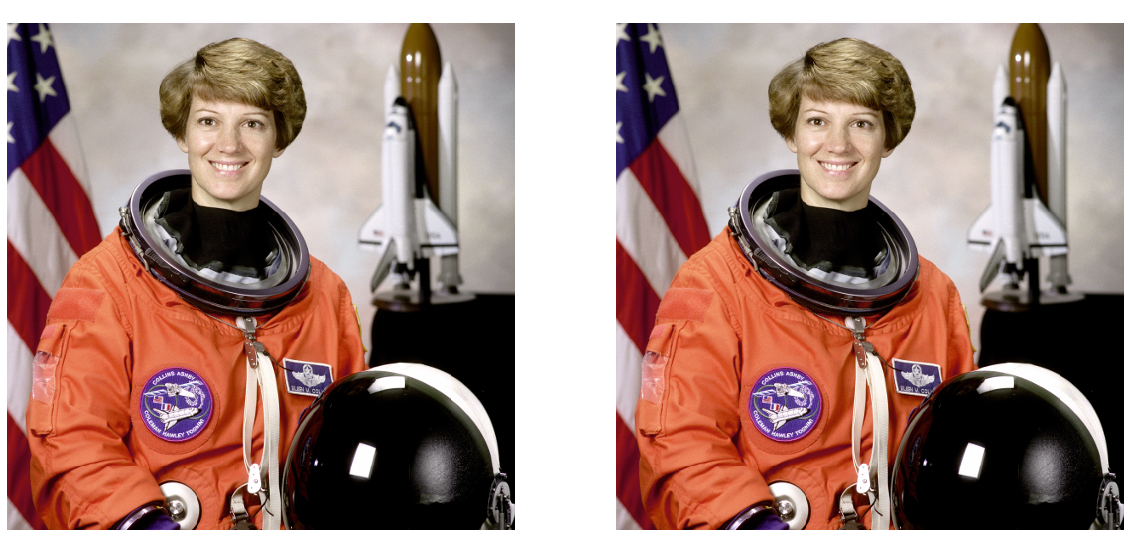

In [7]:
imf = im2double(im)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.imshow(im)
ax.set_title('Astronaut RGB  uint8 image')
ax = fig.add_subplot(1,2,2)
ax.imshow(imf)
ax.set_title('Astronaut RGB  float image');

print("""
First ten elements of uint8 and float images :
Uint8 data :{}
Float data: {}
""".format(list(im[0,:10,0]),[float('{:.2f}'.format(elem)) for elem in list(imf[0,:10,0])]))

In [0]:
def rgb2XYZ(im):
    """
    rgb2XYZ(im) is a function that convert space color representation of an image from sRGB to XYZ
    input:
        im : an RGB image 
    output:
        XYZ : an XYZ image
    """
    M =  np.array([
        [0.4124564, 0.3575761, 0.1804375],
        [0.2126729, 0.7151522, 0.0721750],
        [0.0193339, 0.1191920, 0.9503041]
    ])
    
    if im.shape[2]!=3:
        assert("the image must be a true color image in RGB space !!!")
    if im.dtype != 'float':
        im = im2double(im)
    
    im = linRGB(im)
    tmp = np.zeros(im.shape)
    XYZ = tmp.copy()
    D65 = (94.811,100,107.304)
    
    for k in range(3):
        for i in range(3):
            tmp[:,:,k] = tmp[:,:,k]+ M[k,i]*im[:,:,i]
        XYZ[:,:,k] = tmp[:,:,k]*255/D65[k]
    
    return XYZ

In [0]:
def XYZ2Lab(im):
    """
    XYZ2Lab is a function that transform an image data from XYZ space to Lab space
    input :abs
        im : a rgb image
    output:
        a Lab components
    """
    eps = 216/24389
    kappa = 24389/27
    F = np.zeros(im.shape)
    F[im<=eps]=(im[im<=eps]*kappa+16)/116
    F[im>eps] = np.power(im[im>eps],1/3)
    L = 116*F[:,:,1]-16
    a = 500*(F[:,:,0]-F[:,:,1])
    b = 200*(F[:,:,1]-F[:,:,2])
    
    return [L,a,b]

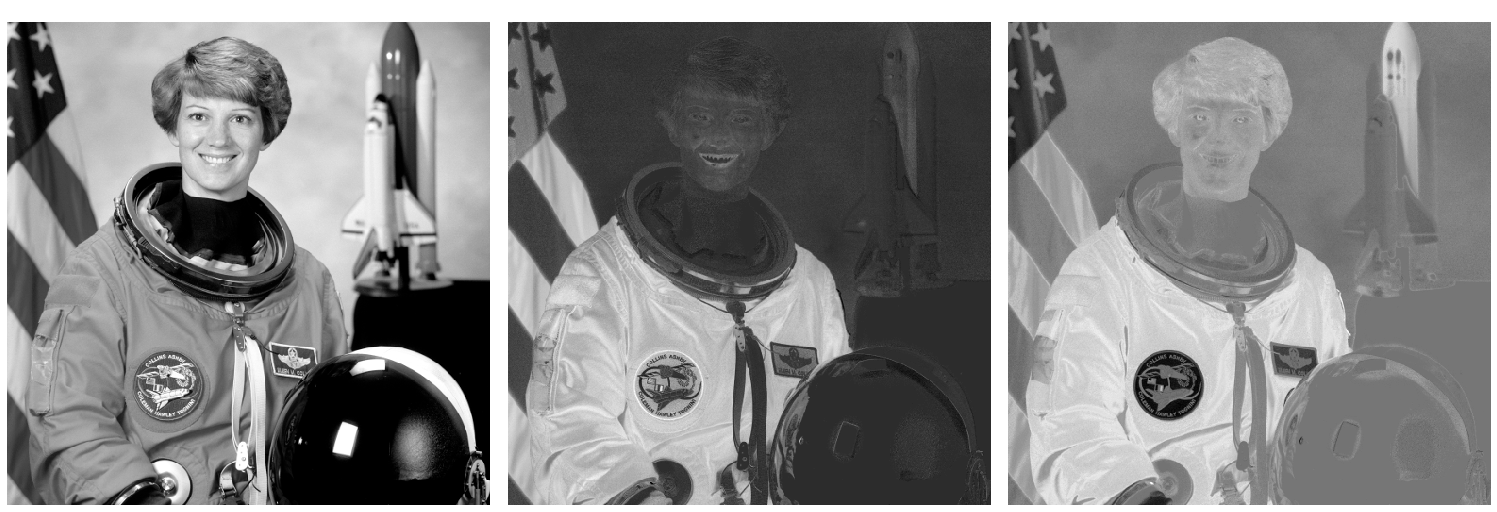

In [10]:
color_list = ['Luminance','channel a','channel b']
im_comp = XYZ2Lab(rgb2XYZ(im))
axs = plt.subplots(1,3,figsize=(21,7))[1].ravel()
for ax, obj, canal in zip(axs,im_comp,color_list):
    ax.imshow(obj,cmap='gray')
    ax.set_title(canal)
    #plt.colorbar(cbar, orientation='vertical')

plt.tight_layout()

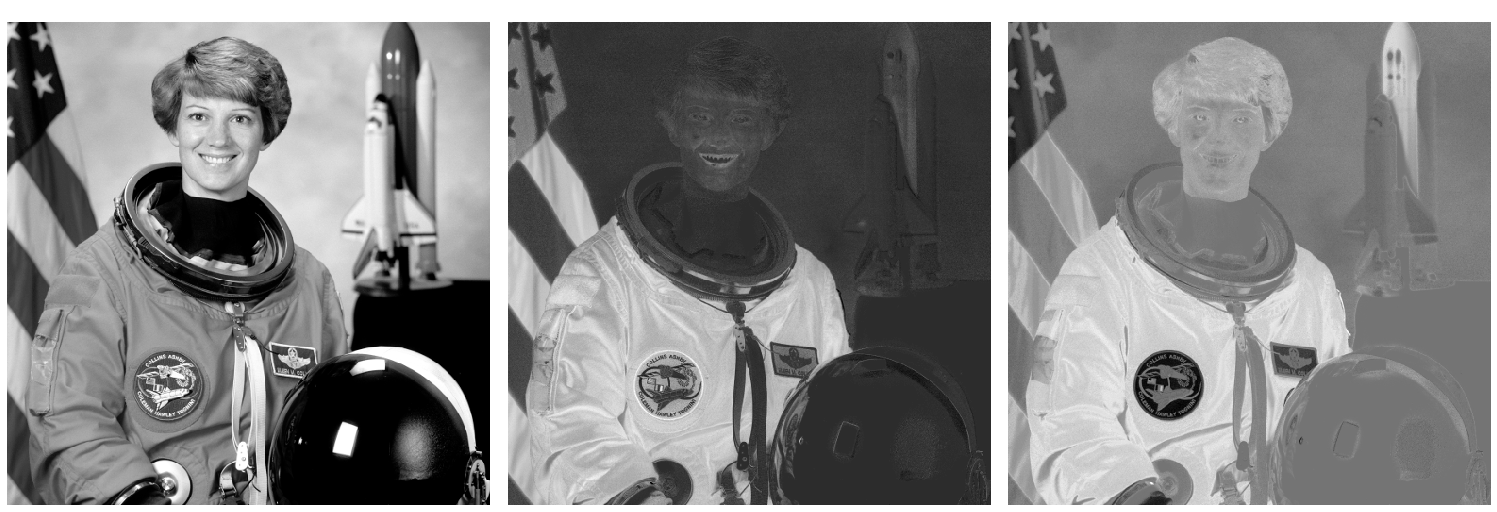

In [11]:
im_comp = channelDecompose(color.rgb2lab(im))
color_list = ['Luminance','channel a','channel b']
axs = plt.subplots(1,3,figsize=(21,7))[1].ravel()
for ax, obj, canal in zip(axs,im_comp,color_list):
    ax.imshow(obj,cmap='gray')
    ax.set_title(canal)
    #plt.colorbar(cbar, orientation='vertical')

plt.tight_layout()

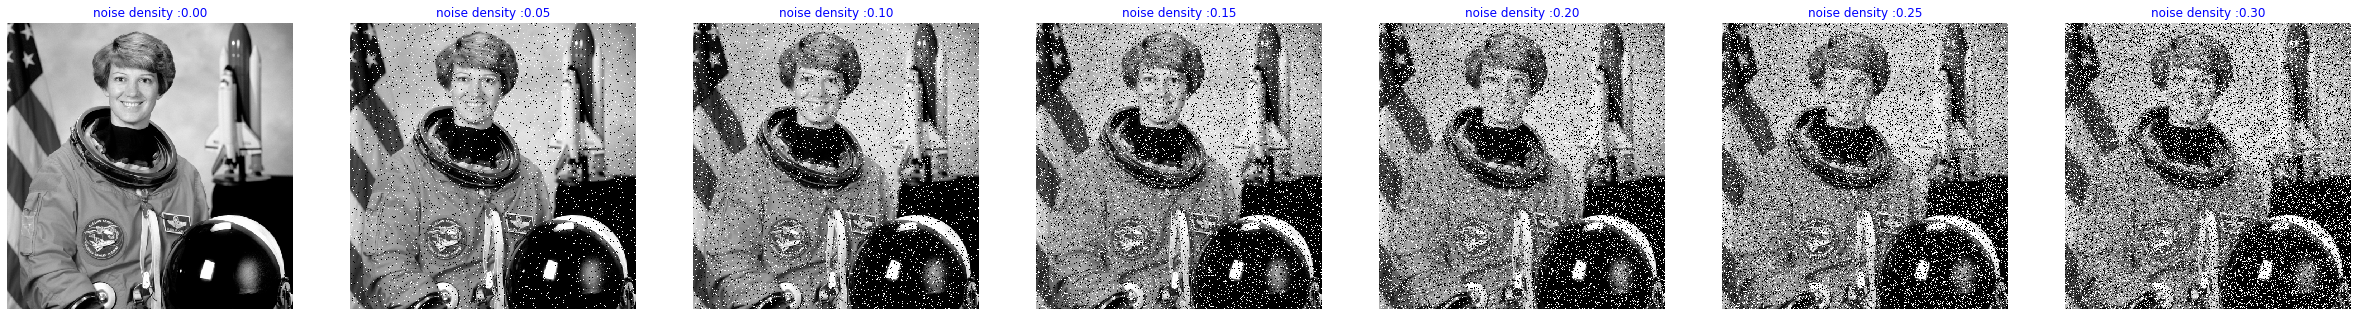

In [12]:
density = [i*0.05 for i in range(7)]
imgray = (im_comp[0] - im_comp[0].min())/(im_comp[0].max()-im_comp[0].min())
for i, dens in enumerate(density):
    tmp = (rn(imgray,mode='s&p',amount=dens)*255).astype('uint8')
    io.imsave('images/im0{}_sp.png'.format(i),tmp)

ic = io.ImageCollection(load_pattern='images/*.png')
axs = plt.subplots(1,len(ic),figsize=(42,7))[1].ravel()
for ax, dens, obj in zip(axs,density,ic):
    ax.imshow(obj,cmap='gray')
    ax.set_title('noise density :{:.2f}'.format(dens),color='Blue')

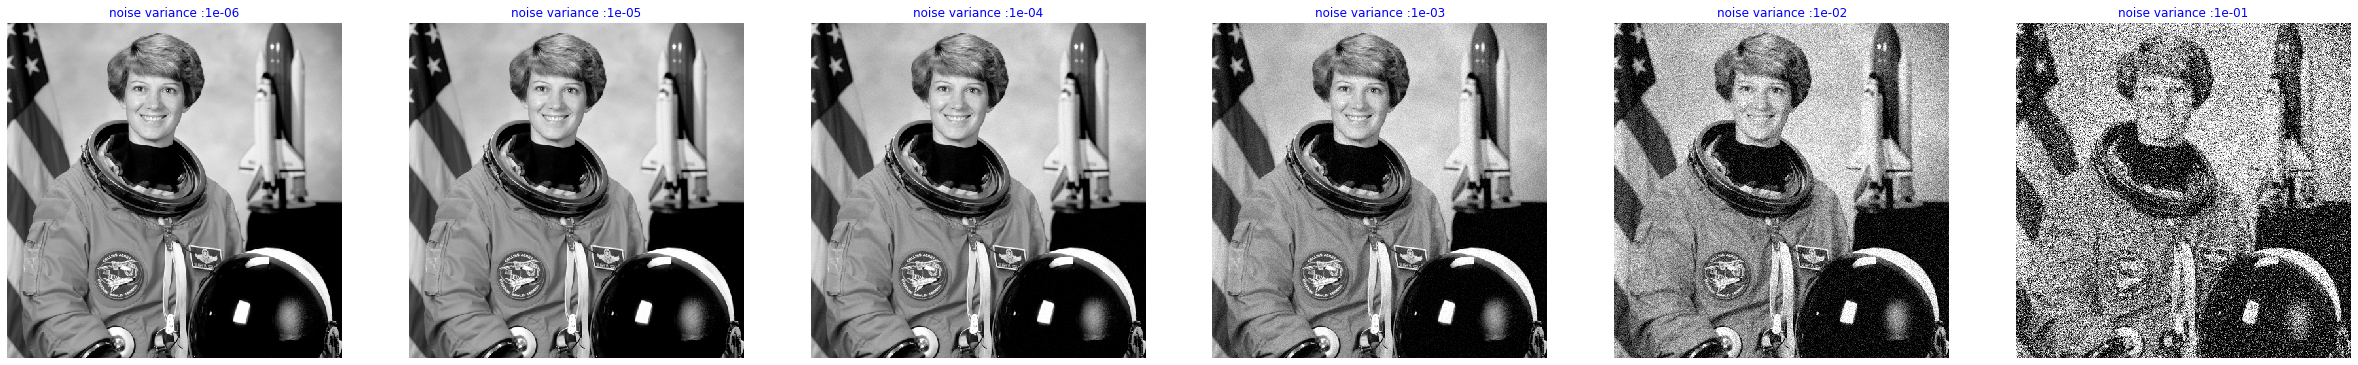

In [13]:
variance = [10**i*1e-6 for i in range(6)]
imgray = (im_comp[0] - im_comp[0].min())/(im_comp[0].max()-im_comp[0].min())
for i, var in enumerate(variance):
    tmp = (rn(imgray,mode='gaussian',mean=0, var=var)*255).astype('uint8')
    io.imsave('images/im0{}_awgn.png'.format(i),tmp)

ic = io.ImageCollection(load_pattern='images/im*awgn.png')
axs = plt.subplots(1,len(ic),figsize=(42,7))[1].ravel()
for ax, var, obj in zip(axs,variance,ic):
    ax.imshow(obj,cmap='gray')
    ax.set_title('noise variance :{0:1.0e}'.format(var),color='Blue')

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


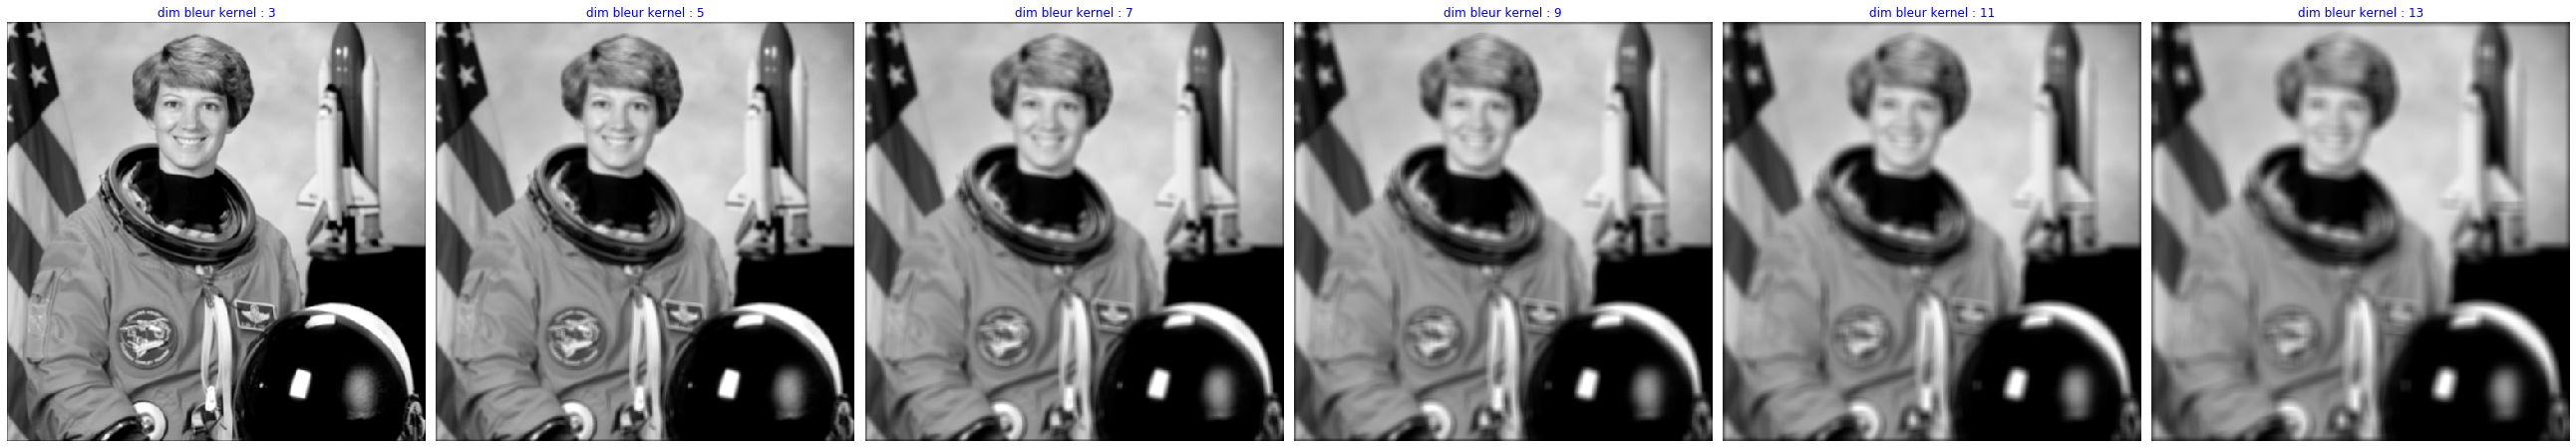

In [14]:
from scipy.signal import convolve2d
kern_dim = [2*i+1 for i in range(1,7)]
for i, dim in enumerate(kern_dim):
  blurKern = 1/dim**2*np.ones((dim,dim))
  io.imsave('images/im0{}_blur.png'.format(i),convolve2d(imgray,blurKern,mode='same'))

ic = io.ImageCollection(load_pattern='images/im*blur.png')
axs = plt.subplots(1,len(ic),figsize=(36,7))[1].ravel()
for dim, obj, ax in zip(kern_dim,ic,axs):
  ax.imshow(obj,cmap='gray')
  ax.set_title("dim bleur kernel : {}".format(dim),color='Blue')
plt.tight_layout()

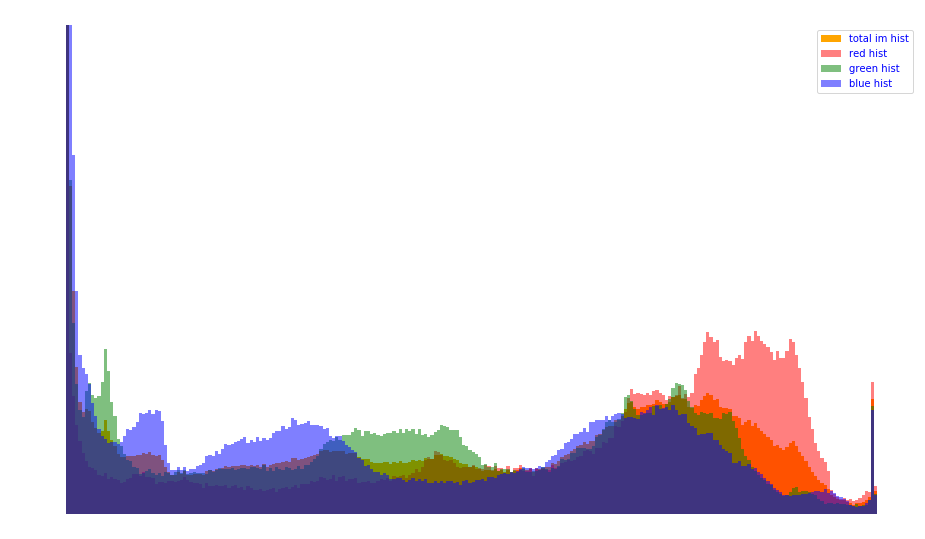

In [49]:
color = ['red','green','blue']
ax = plt.subplots(figsize=(16,9))[1]
h = ax.hist(im.ravel(),bins=256,color='orange',density=True)
ax.set_title("histograme of rgb astronaut pic", color='white',fontsize=16)
ax.set_xlabel("tone intensity",color='white',fontsize=14)
ax.set_ylabel("tone frequency",color='white',fontsize=14)
for i in range(len(im.shape)):
  h = ax.hist(im[:,:,i].ravel(),bins=256,color=color[i],alpha=0.5,density=True)
  ax.set_ylim([0,h[0][1:-1].max()])

ax.legend(['total im hist','red hist','green hist','blue hist'])
ax.axis(True);